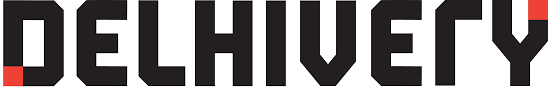

## About Delhivery
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting edge engineering and technology capabilites.

The Data team builds intelligence and capabilities using the data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Business Problem


The company wants to understand and process the data coming out of data engineering pipelines:
- Clean, sanitize and manipulate data to get useful features out of raw fields.
- Make sense out of the raw data and help the data science team to build forecasting models on it.

## Importing the libraries

In [696]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro,levene,mannwhitneyu
import warnings
warnings.simplefilter('ignore')

## Reading the dataset

In [697]:
df = pd.read_csv("delhivery_data.csv")

In [698]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## About the dataset

In [699]:
df.shape

(144867, 24)

The dataset has 144867 rows and 24 columns.

#### About the columns.
- data - tells whether the data is testing or training data.


- trip_creation_time - Timestamp of a trip creation.


- route_schedule_uuid - Unique Id for a particular route schedule.


- route_type - Transportation type
    - FTL - Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles(carts)


- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)


- source_center - Source ID of trip origin


- source_name - Source name of trip origin


- destination_center - Destination ID


- destination_name - Destination Name


- od_start_time - Trip start time


- od_end_time - Trip end time


- start_scan_to_end_scan - Time taken to deliver from source to destination


- is_cutoff - Unknown field


- cutoff_factor - Unknown field


- cutoff_timestamp - Unknown field


- actual_distance_to_destination - Distance in Kms between source and destination warehouse


- actual_time - Actual time taken to complete the delivery(Cumulative)


- osrm_time - An open-source routing engine time calculator which computes the shortest path between points in a given map(Includes ususal traffic, distance through major and minor roads) and gives the time(Cumulative)


- osrm_distance - An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)


- factor - Unknown field


- segment_actual_time - This is a segment time. Time taken by the subset of the packagte delivery .


- segment_osrm_time - This is the OSRM segment time. Time taken by the subset of the package delivery


- segment_osrm_distance - This is the OSRM distance. Distance covered by subset of the package delivery.


- segment_factor - Unknown field.

## 1. Basic data cleaning and exploration

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## Finding the number of null values in each columns

In [701]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

## Visualizing the null values

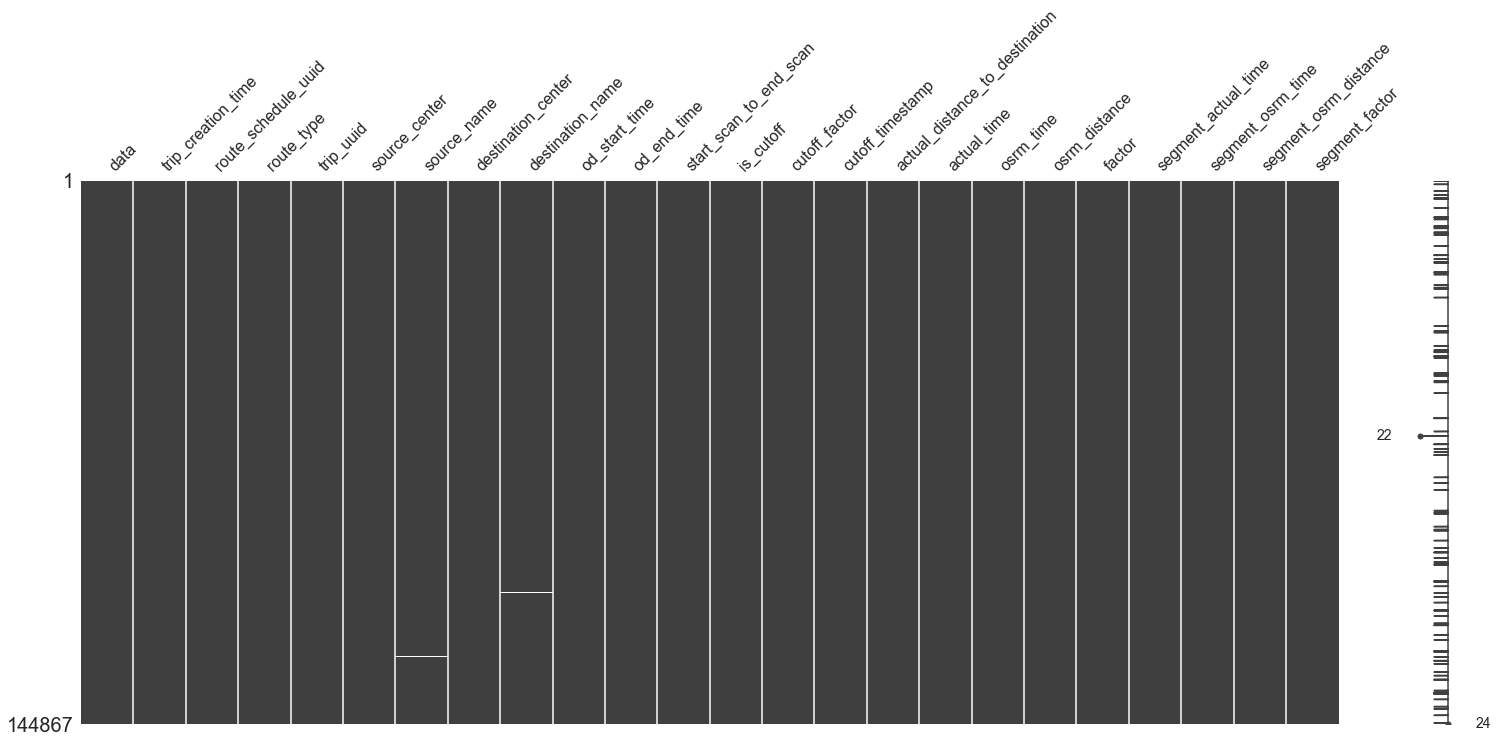

In [702]:
msno.matrix(df)
plt.show()

## Observations
From the above graph we can observe that we have missing values in the fields:
- source_name
- destination_name

#### Handling Missing values
- Creating a table containing all the destination ids and source ids and their respective centers
- We can find the missing values from the combined table
- If still missing values are there than we replace the Nan values with 'unknown region'

In [703]:
t1 = df[['source_center','source_name']]
t2 = df[['destination_center','destination_name']]
t2.rename(columns = {
    'destination_center':'source_center',
    'destination_name':'source_name'
},inplace = True)
destination_table = pd.concat([t1,t2])
destination_table.drop_duplicates(keep = 'first',inplace = True)
destination_table

,source_center,source_name
0,IND388121AAA,Anand_VUNagar_DC (Gujarat)
5,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
10,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra)
15,IND400011AAA,LowerParel_CP (Maharashtra)
17,IND562132AAA,Bangalore_Nelmngla_H (Karnataka)
...,...,...
124763,IND828205AAA,Nirsa_ShantiDPP_D (Jharkhand)
132280,IND333502AAA,Buhana_CourtDPP_D (Rajasthan)
137413,IND110085AAA,North Delhi (Delhi)
137862,IND683511AAB,Kerala_Cochin_L (Kerala)


In [704]:
destination_table.isnull().sum()

source_center     0
source_name      14
dtype: int64

## Replacing the null values with Unknown Region in the destination table

In [705]:
destination_table.loc[
    destination_table['source_name'].isnull(),
    'source_name'] = 'Unknown Region'

In [706]:
destination_table.isnull().sum()

source_center    0
source_name      0
dtype: int64

## Replacing the missing values of source and destination with 'Unknown region'

In [707]:
a = df.merge(destination_table,on = 'source_center',how = 'inner')
a.loc[a['source_name_x'].isnull(),'source_name_x'] = a['source_name_y']
a.drop('source_name_y',axis = 1,inplace = True)
b = a.merge(destination_table,left_on = 'destination_center',
             right_on = 'source_center',
             how = 'inner')
b.loc[b['destination_name'].isnull(),'destination_name'] = b['source_name']
b.drop(['source_name','source_center_y'],inplace = True,axis = 1)
b.rename(columns = {
    'source_center_x':'source_center',
    'source_name_x':'source_name'
},inplace = True)
b.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [708]:
df = b

## Converting to datetime format
- trip_creation_time field 
- od_start_time field
- od_end_time field

In [709]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

## Aggregating the data based on Trip Unique Id

#### Here osrm_time,actual_time and osrm_distance are cummulative but cummulative from one center to another center. A trip will have multiple source centers so, check2 function appends the last value or (max value) of each center. Later we will sum it to find the total for each trip.

In [710]:

def check2(y, source_center,col_name):
    l = pd.DataFrame(y)
    l['source_center'] = source_center
    q = l.groupby(source_center)[col_name].max().reset_index()
    return list(q[col_name])

z = df.groupby(['trip_uuid']).aggregate({
    "data": "unique",
    "trip_creation_time": "unique",
    "route_schedule_uuid": "unique",
    "route_type": "unique",
    "source_center":"first",
    "source_name": "first",
    "destination_center": "last",
    "destination_name": "last",
    "od_start_time": "min",
    "od_end_time": "max",
    "start_scan_to_end_scan":"unique",
    "actual_distance_to_destination":"sum",
    "actual_time": lambda x: check2(x, df['source_center'],'actual_time'),
    "osrm_time": lambda x: check2(x,df['source_center'],'osrm_time'),
    "osrm_distance": lambda x:check2(x,df['source_center'],'osrm_distance'),
    "segment_actual_time":"sum",
    "segment_osrm_time":"sum",
    "segment_osrm_distance":"sum"
}).reset_index()


In [711]:
z

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,[training],[2018-09-12T00:00:16.535741000],[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...,[FTL],IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,"[1260.0, 999.0]",8860.812105,"[732.0, 830.0]","[349.0, 394.0]","[446.5496, 544.8027]",1548.0,1008.0,1320.4733
1,trip-153671042288605164,[training],[2018-09-12T00:00:22.886430000],[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...,[Carting],IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,"[122.0, 58.0]",240.208306,"[47.0, 96.0]","[26.0, 42.0]","[28.1994, 56.9116]",141.0,65.0,84.1894
2,trip-153671043369099517,[training],[2018-09-12T00:00:33.691250000],[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...,[FTL],IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,"[3099.0, 834.0]",68163.502238,"[611.0, 2736.0]","[212.0, 1529.0]","[281.21090000000004, 2090.8743]",3308.0,1941.0,2545.2678
3,trip-153671046011330457,[training],[2018-09-12T00:01:00.113710000],[thanos::sroute:f0176492-a679-4597-8332-bbd1c7...,[Carting],IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,[100.0],28.529648,[59.0],[15.0],[19.68],59.0,16.0,19.8766
4,trip-153671052974046625,[training],[2018-09-12T00:02:09.740725000],[thanos::sroute:d9f07b12-65e0-4f3b-bec8-df0613...,[FTL],IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,"[485.0, 152.0, 80.0]",239.007304,"[147.0, 131.0, 63.0]","[46.0, 44.0, 27.0]","[63.6461, 53.5761, 29.5696]",340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,[test],[2018-10-03T23:55:56.258533000],[thanos::sroute:8a120994-f577-4491-9e4b-b7e4a1...,[Carting],IND160102AAD,Chandigarh_Raiprkln_C (Chandigarh),IND140603AAA,Zirakpur_DC (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,"[105.0, 152.0]",141.057373,"[34.0, 49.0]","[28.0, 34.0]","[28.8991, 44.5639]",82.0,62.0,64.8551
14813,trip-153861104386292051,[test],[2018-10-03T23:57:23.863155000],[thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b7576...,[Carting],IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,[60.0],25.130640,[21.0],[12.0],[16.0882],21.0,11.0,16.0883
14814,trip-153861106442901555,[test],[2018-10-03T23:57:44.429324000],[thanos::sroute:5609c268-e436-4e0a-8180-3db4a7...,[Carting],IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,"[248.0, 173.0]",93.743842,"[190.0, 92.0]","[29.0, 25.0]","[32.2277, 31.0564]",281.0,88.0,104.8866
14815,trip-153861115439069069,[test],[2018-10-03T23:59:14.390954000],[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...,[Carting],IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,"[105.0, 91.0, 44.0, 62.0, 45.0]",355.281673,"[60.0, 33.0, 51.0, 90.0, 30.0]","[50.0, 31.0, 41.0, 48.0, 14.0]","[52.807, 25.7087, 42.5213, 40.608, 16.0185]",258.0,221.0,223.5324


In [712]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  object        
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st

In [713]:
z = z.explode('trip_creation_time')
z = z.explode('data')
z = z.explode('route_schedule_uuid')
z = z.explode('route_type')

In [714]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14817 entries, 0 to 14816
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st

In [715]:
def getsource(x):
    return x[0]
def getdestination(x):
    return x[-1]
#z['source_center'] = z['source_center'].apply(getsource)
#z['source_name'] = z['source_name'].apply(getsource)
#z['destination_center'] = z['destination_center'].apply(getdestination)
#z['destination_name'] = z['destination_name'].apply(getdestination)

## Summing of all the time and distance fields for each trip

In [716]:
def getsum(x):
    return sum(x)
z['start_scan_to_end_scan']=z['start_scan_to_end_scan'].apply(getsum)
z['actual_time'] = z['actual_time'].apply(getsum)
z['osrm_time'] = z['osrm_time'].apply(getsum)
z['osrm_distance'] = z['osrm_distance'].apply(getsum)

In [717]:
z

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,8860.812105,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,240.208306,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,68163.502238,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,239.007304,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160102AAD,Chandigarh_Raiprkln_C (Chandigarh),IND140603AAA,Zirakpur_DC (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,141.057373,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,93.743842,282.0,54.0,63.2841,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,355.281673,264.0,184.0,177.6635,258.0,221.0,223.5324


## 2. Build some features to prepare the data for actual analysis

#### Extracting city,place,code and state from source and destination fields

In [718]:
def extract_city(x):
    s=''
    city = ''
    place = ''
    code = ''
    state = ''
    c=0
    if x=='Unknown Region':
        city = 'Unknow City'
        place = 'Unknown Place'
        state = 'Unknown State'
        code = 'Unknown Code'
    else:
        for i in x:
            if i!='_' and i!='(' and i!=')' and i!=' ':
                s+=i
            elif i=='_' or i==' ':
                c+=1
                if c==1:
                    city = s
                    s=''
                elif c==2:
                    place = s
                    s=''
                else:
                    s+=i
            elif i=='(':
                code = s
                s=''
        state = s
        
    return (city,place,code,state)
                
z['source'] = z['source_name'].apply(extract_city)
z['destination'] = z['destination_name'].apply(extract_city)

In [719]:
def getinfo(x,y):
    if y=='city':
        return x[0]
    elif y=='place':
        return x[1]
    elif y=='code':
        return x[2]
    elif y=='state':
        return x[3]
    
z['source_city'] = z['source'].apply(lambda x: getinfo(x,'city'))
z['source_place'] = z['source'].apply(lambda x: getinfo(x,'place'))
z['source_code'] = z['source'].apply(lambda x: getinfo(x,'code'))
z['source_state'] = z['source'].apply(lambda x: getinfo(x,'state'))

z['destination_city'] = z['destination'].apply(lambda x: getinfo(x,'city'))
z['destination_place'] = z['destination'].apply(lambda x: getinfo(x,'place'))
z['destination_code'] = z['destination'].apply(lambda x: getinfo(x,'code'))
z['destination_state'] = z['destination'].apply(lambda x: getinfo(x,'state'))

#### Extracting features like month,day,year,hour from trip_creation_time field

In [720]:
z['month'] = z['trip_creation_time'].dt.month_name()
z['year'] = z['trip_creation_time'].dt.year
z['day'] = z['trip_creation_time'].dt.day
z['hour'] = z['trip_creation_time'].dt.hour

In [721]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14817 entries, 0 to 14816
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st

In [722]:
z['diff_start_end'] = z['od_end_time']-z['od_start_time']
z['diff_start_end'] = z['diff_start_end'].dt.total_seconds()/60

#### Dropping few extra columns.

In [723]:
z.drop(columns = ['source','destination',
        'destination_place','destination_code',
       'source_place','source_code','source_center',
        'source_name','destination_center','destination_name',
       'trip_creation_time'],axis = 1,inplace = True)

## Descriptive Analysis for numerical attributes

In [724]:
z.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,day,hour,diff_start_end
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.0,14817.000000,14817.000000,14817.000000
mean,530.146656,2288.554169,356.814875,161.910171,204.911708,353.892286,180.949787,223.201161,2018.0,18.370790,12.449821,547.476797
std,658.577183,8798.110164,561.007457,272.146825,370.575816,556.247965,314.542047,416.628374,0.0,7.893275,7.986553,668.686846
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,2018.0,1.000000,0.000000,23.461468
25%,149.000000,49.597866,67.000000,29.000000,30.941800,66.000000,31.000000,32.654500,2018.0,14.000000,4.000000,151.158488
50%,279.000000,134.059655,149.000000,60.000000,65.882600,147.000000,65.000000,70.154400,2018.0,19.000000,14.000000,288.570339
75%,635.000000,463.956888,369.000000,169.000000,208.765800,367.000000,185.000000,218.802400,2018.0,25.000000,20.000000,673.301364
max,7898.000000,85110.885093,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,2018.0,30.000000,23.000000,7898.551955


## Descriptive Analysis for categorical attributes

In [725]:
z.describe(include = 'object')

,trip_uuid,data,route_schedule_uuid,route_type,source_city,source_state,destination_city,destination_state,month
count,14817,14817,14817,14817,14817,14817,14817,14817,14817
unique,14817,2,1504,2,774,33,953,35,2
top,trip-153671041653548748,training,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,Bengaluru,Maharashtra,Bengaluru,Maharashtra,September
freq,1,10654,53,8908,1057,2674,1099,2572,13029


## Observation
- The most common type of data is of training data.
- The most common type of route_type is carting.
- The city from which maximum number of trips started and ended is Bengaluru.
- The state from which maximum number of trips started and ended is Maharashtra.
- September has the maximum number of trips.

## Outlier Detection

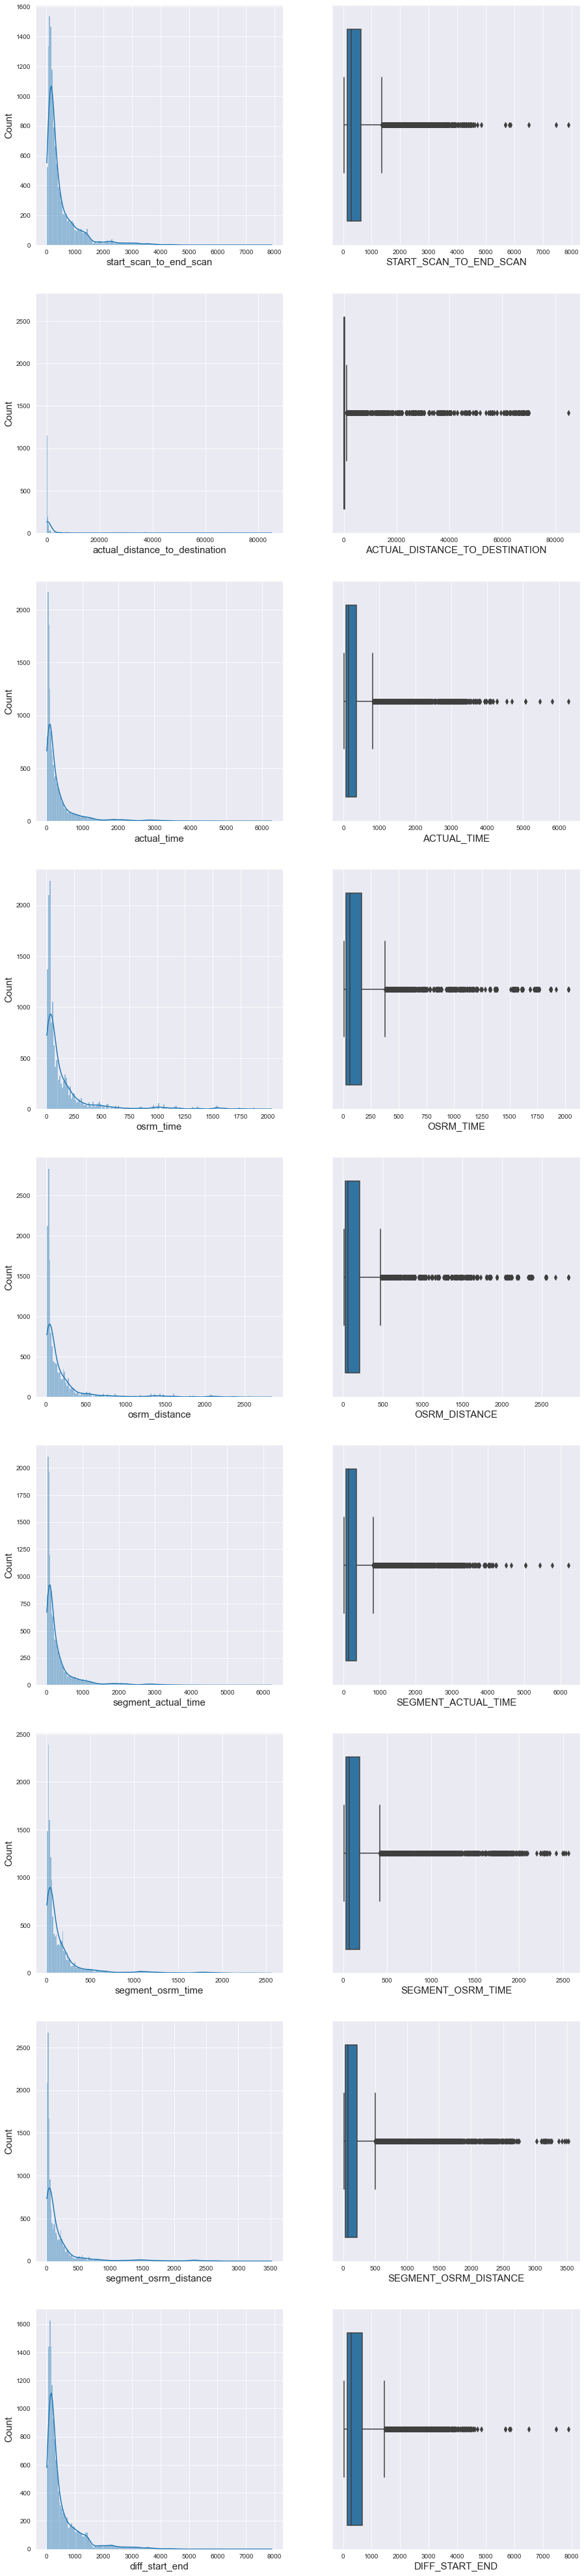

In [726]:
cols = ['start_scan_to_end_scan','actual_distance_to_destination',
        'actual_time','osrm_time','osrm_distance','segment_actual_time',
        'segment_osrm_time','segment_osrm_distance','diff_start_end']

plt.figure(figsize=(15,72))
sns.set_style('darkgrid')
for i in range(len(cols)):
    plt.subplot(9,2,((2*i)+1))
    sns.histplot(data = z,x = cols[i],kde = True)
    plt.xlabel(cols[i],fontsize = 15)
    plt.ylabel('Count',fontsize = 15)
    
    plt.subplot(9,2,((2*i)+2))
    sns.boxplot(data = z,x = cols[i])
    plt.xlabel(cols[i].upper(),fontsize = 15)
plt.show()

## Observation
- Attributes like:
    - start_scan_to_end_scan
    - actual_distance_to_destination
    - actual_time
    - osrm_time
    - osrm_distance
    - segment_actual_time
    - segment_osrm_time
    - segment_osrm_distance
    - diff_start_end

follow left skewed distribution and all of these attributes have outliers.

## Handling of outliers using iqr.

In [727]:
q1 = z[cols].quantile(0.25)
q3 = z[cols].quantile(0.75)
iqr = q3-q1

In [728]:
lower = q1-1.5*iqr
lower = lower.apply(lambda x:max(x,0))
lower

start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
diff_start_end                    0
dtype: int64

In [729]:
upper = q3+1.5*iqr
upper

start_scan_to_end_scan            1364.000000
actual_distance_to_destination    1085.495420
actual_time                        822.000000
osrm_time                          379.000000
osrm_distance                      475.501800
segment_actual_time                818.500000
segment_osrm_time                  416.000000
segment_osrm_distance              498.024250
diff_start_end                    1456.515679
dtype: float64

## Removing the outliers

In [730]:
final_data = z.loc[((z[cols]>=lower) & (z[cols]<=upper)).any(axis = 1)]
final_data

,trip_uuid,data,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,segment_osrm_distance,source_city,source_state,destination_city,destination_state,month,year,day,hour,diff_start_end
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,240.208306,143.0,68.0,...,84.1894,Tumkur,Karnataka,Chikblapur,Karnataka,September,2018,12,0,181.611874
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,28.529648,59.0,15.0,...,19.8766,Mumbai,Maharashtra,Mumbai,Maharashtra,September,2018,12,0,100.494935
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,239.007304,341.0,117.0,...,146.7919,Sandur,Karnataka,Sandur,Karnataka,September,2018,12,0,718.349042
5,trip-153671055416136166,training,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,34.407865,61.0,23.0,...,28.0647,Chennai,Tamil Nadu,Chennai,Tamil Nadu,September,2018,12,0,190.487849
6,trip-153671066201138152,training,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,...,12.0184,Chennai,Tamil Nadu,Chennai,Tamil Nadu,September,2018,12,0,98.005634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,141.057373,83.0,62.0,...,64.8551,Chandigarh,Chandigarh,Zirakpur,Punjab,October,2018,3,23,405.485842
14813,trip-153861104386292051,test,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,25.130640,21.0,12.0,...,16.0883,FBD,Haryana,Faridabad,Haryana,October,2018,3,23,60.590521
14814,trip-153861106442901555,test,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,93.743842,282.0,54.0,...,104.8866,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh,October,2018,3,23,422.119867
14815,trip-153861115439069069,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,355.281673,264.0,184.0,...,223.5324,Tirunelveli,Tamil Nadu,Peikulam,Tamil Nadu,October,2018,3,23,348.512862


## Univariate Analysis

In [731]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13873 entries, 1 to 14816
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       13873 non-null  object        
 1   data                            13873 non-null  object        
 2   route_schedule_uuid             13873 non-null  object        
 3   route_type                      13873 non-null  object        
 4   od_start_time                   13873 non-null  datetime64[ns]
 5   od_end_time                     13873 non-null  datetime64[ns]
 6   start_scan_to_end_scan          13873 non-null  float64       
 7   actual_distance_to_destination  13873 non-null  float64       
 8   actual_time                     13873 non-null  float64       
 9   osrm_time                       13873 non-null  float64       
 10  osrm_distance                   13873 non-null  float64       
 11  se

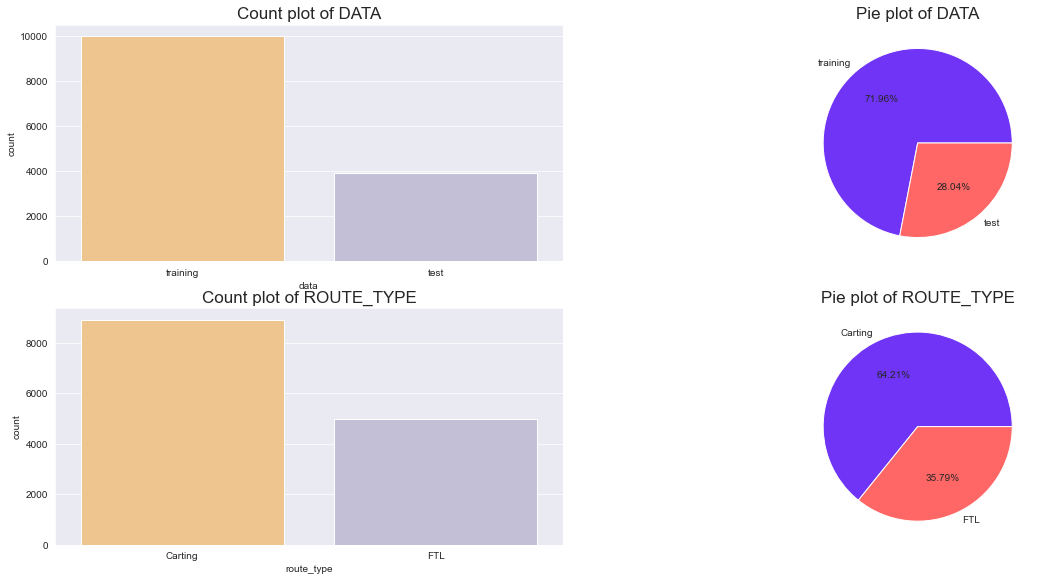

In [732]:
cat = ['data','route_type']
colors = ['#7034F6','#ff6666']
plt.figure(figsize = (20,20))
for i in range(len(cat)):
    plt.subplot(4,2,(2*i)+1)
    plt.title(f'Count plot of {cat[i].upper()}',fontsize = 17)
    sns.countplot(data = final_data,x = cat[i],palette = 'PuOr')
    
    plt.subplot(4,2,(2*i)+2)
    plt.title(f'Pie plot of {cat[i].upper()}',fontsize = 17)
    x = final_data[cat[i]].value_counts().reset_index(name = 'counts')
    plt.pie(x = x['counts'],labels = x['index'],autopct = '%0.2f%%',colors = colors)
plt.show()
    

## Observations
- for data field majority of the datapoints are of Training Data consisting of 71.96% fo the total.
- for route_type majority of the route types  are of Carting consisting of 64.21% of the total.

## Finding the busiest routes.

In [733]:
busy_routes = final_data['route_schedule_uuid'].value_counts().reset_index(name = 'count')
busy_routes

,index,count
0,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
1,thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5...,46
2,thanos::sroute:c736b86f-5c1d-4497-832c-876db4c...,43
3,thanos::sroute:ca336899-47aa-4622-9885-b9fbb23...,41
4,thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b60...,40
...,...,...
1442,thanos::sroute:fe6aca61-0f5c-4866-80ac-10ee8c7...,1
1443,thanos::sroute:7b3644f2-878b-4b57-b630-1fcd7a4...,1
1444,thanos::sroute:11448700-b0d6-4009-afa6-79d2b56...,1
1445,thanos::sroute:ec18d277-5dba-47d4-82da-61863a6...,1


#### Taking only the top 10 busuiest routes

In [734]:
busy_routes = busy_routes.loc[0:10,:]
busy_routes.rename(columns = {
    'index':'routes_uid'
},inplace = True)

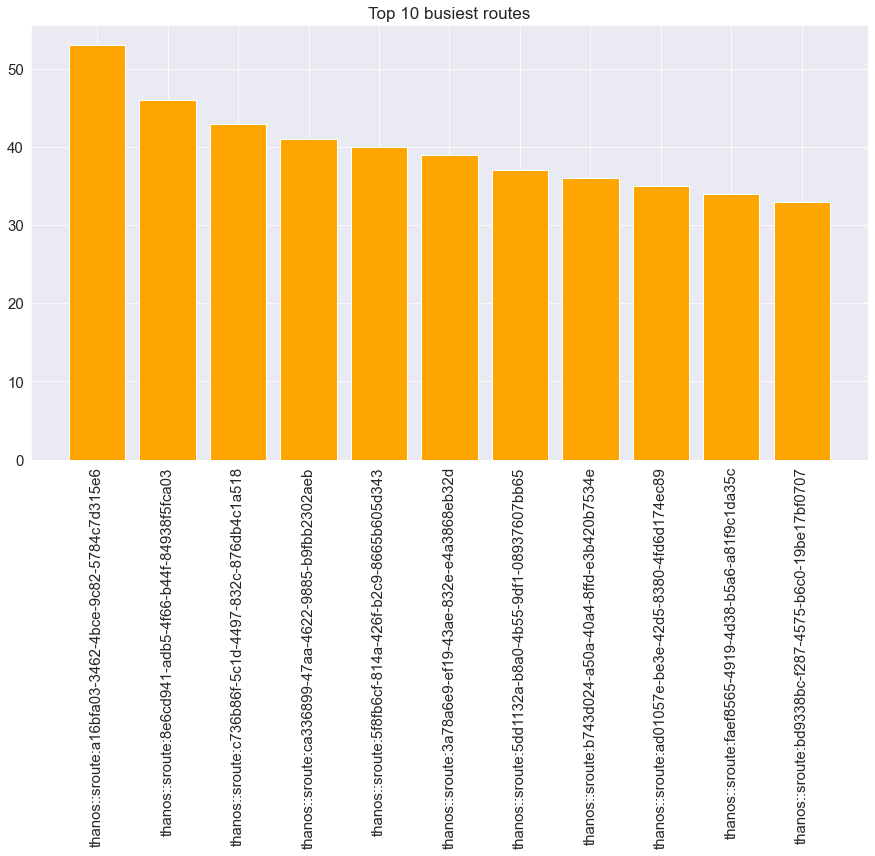

In [735]:
colors = ['#7034F6','#ff6666','#20b2aa','#ff80ed','#f9b405',
          '#cc9e85','#3ef1be','#bafa7b','#ff66ff','#ff6600']
x=busy_routes['routes_uid']
y = busy_routes['count']
plt.figure(figsize =(15,8))
plt.title('Top 10 busiest routes',fontsize = 17)
plt.bar(x,y,color = 'orange')
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Finding the start and end points of the busiest route

In [736]:
x = final_data.loc[final_data['route_schedule_uuid']=='thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6']
x['source_city'].unique()

array(['LowerParel'], dtype=object)

In [737]:
x = final_data.loc[final_data['route_schedule_uuid']=='thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6']
x['destination_city'].unique()

array(['Mumbai'], dtype=object)

## Observations
- The busiest route starts from Lower Parel and ends at Mumbai in Maharashtra

## Finding the city and state where trips originate

#### Plotting the top 10 cities where trips originate

In [738]:
export = final_data['source_city'].value_counts().reset_index(name = 'counts')
export

,index,counts
0,Bengaluru,1055
1,Mumbai,881
2,Gurgaon,787
3,Bhiwandi,689
4,Bangalore,601
...,...,...
766,Lalitpur,1
767,Vadakara,1
768,Mainpuri,1
769,Hajipur,1


In [739]:
export = export.loc[0:9,:]
export.rename(columns = {'index':'cities'},inplace = True)
export

,cities,counts
0,Bengaluru,1055
1,Mumbai,881
2,Gurgaon,787
3,Bhiwandi,689
4,Bangalore,601
5,Delhi,476
6,Hyderabad,416
7,Pune,379
8,Chennai,334
9,Chandigarh,253


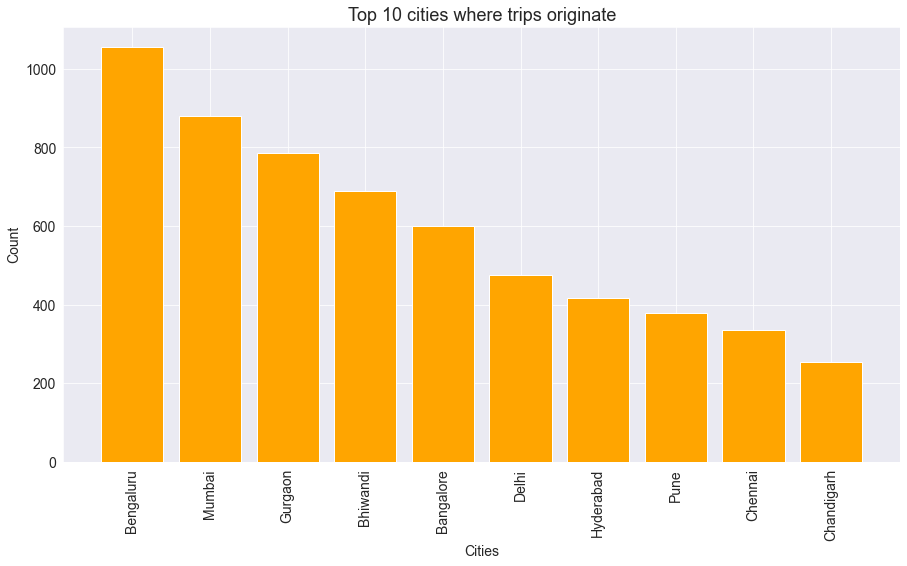

In [740]:
plt.figure(figsize = (15,8))
plt.title('Top 10 cities where trips originate',fontsize = 18)
plt.bar(export['cities'],export['counts'],color = 'orange')
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Count',fontsize = 14)
plt.show()

#### Finding the top 10 states where trip originates

In [741]:
ex_state = final_data['source_state'].value_counts().reset_index(name = 'counts')
ex_state

,index,counts
0,Maharashtra,2518
1,Karnataka,2110
2,Haryana,1367
3,Tamil Nadu,994
4,Uttar Pradesh,743
5,Telangana,731
6,Gujarat,676
7,Delhi,668
8,West Bengal,620
9,Rajasthan,504


In [742]:
ex_state = ex_state.loc[0:9,:]
ex_state.rename(columns = {'index':'states'},inplace = True)
ex_state

,states,counts
0,Maharashtra,2518
1,Karnataka,2110
2,Haryana,1367
3,Tamil Nadu,994
4,Uttar Pradesh,743
5,Telangana,731
6,Gujarat,676
7,Delhi,668
8,West Bengal,620
9,Rajasthan,504


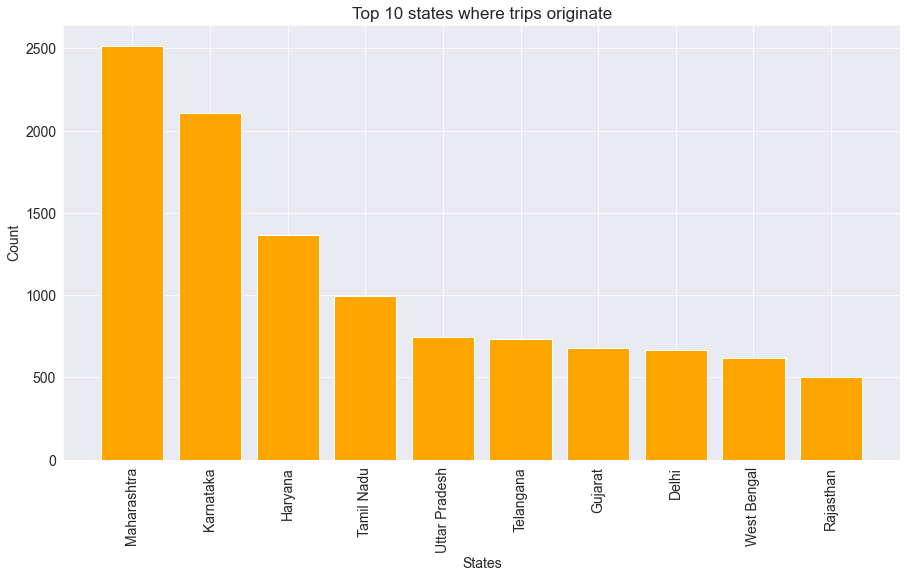

In [743]:
plt.figure(figsize = (15,8))
plt.title('Top 10 states where trips originate',fontsize=17)
plt.bar(ex_state['states'],ex_state['counts'],color = 'orange')
plt.xlabel('States',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Finding the cities and states where majority of the trip ends

#### Finding the top 10 cities where the trip ends

In [744]:
d_city = final_data['destination_city'].value_counts().reset_index(name = 'counts')
d_city.rename(columns = {'index':'city'},inplace = True)
d_city

,city,counts
0,Bengaluru,1099
1,Mumbai,1084
2,Gurgaon,619
3,Bhiwandi,495
4,Delhi,450
...,...,...
945,Chiraiyakot,1
946,Parakkdavu,1
947,Nakhatrana,1
948,Nanoor,1


In [745]:
d_city = d_city.loc[0:9,:]
d_city

,city,counts
0,Bengaluru,1099
1,Mumbai,1084
2,Gurgaon,619
3,Bhiwandi,495
4,Delhi,450
5,Hyderabad,407
6,Chennai,401
7,Bangalore,399
8,Pune,264
9,Sonipat,264


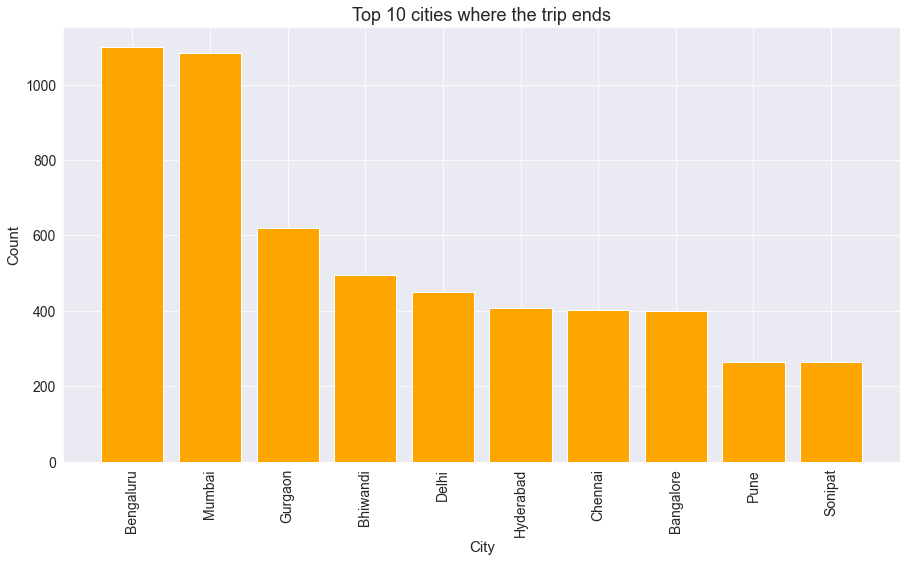

In [746]:
plt.figure(figsize = (15,8))
plt.title('Top 10 cities where the trip ends',fontsize = 18)
plt.bar(d_city['city'],d_city['counts'],color = 'orange')
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('City',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

#### Finding the states where the trip ends

In [747]:
d_state = final_data['destination_state'].value_counts().reset_index(name = 'counts')
d_state.rename(columns={'index':'state'},inplace = True)
d_state

,state,counts
0,Maharashtra,2461
1,Karnataka,2144
2,Haryana,1348
3,Tamil Nadu,1036
4,Uttar Pradesh,786
5,Telangana,705
6,Gujarat,695
7,West Bengal,613
8,Delhi,568
9,Punjab,552


In [748]:
d_state = d_state.loc[0:9,:]
d_state

,state,counts
0,Maharashtra,2461
1,Karnataka,2144
2,Haryana,1348
3,Tamil Nadu,1036
4,Uttar Pradesh,786
5,Telangana,705
6,Gujarat,695
7,West Bengal,613
8,Delhi,568
9,Punjab,552


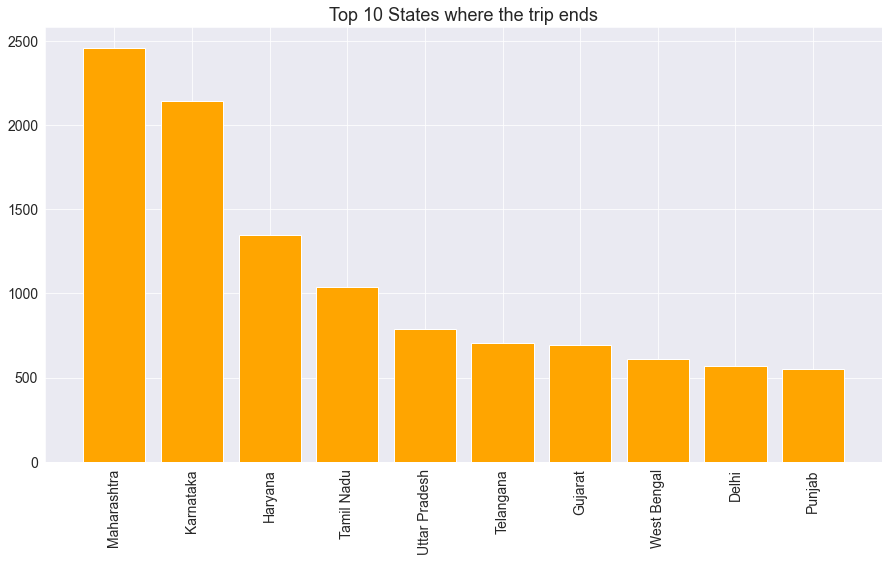

In [749]:
plt.figure(figsize = (15,8))
plt.title('Top 10 States where the trip ends',fontsize = 18)
plt.bar(d_state['state'],d_state['counts'],color = 'orange')
plt.xticks(rotation = 90,fontsize =14)
plt.yticks(fontsize = 14)
plt.show()

## Observations
- It is observed that maximum trips originate and end at Bengaluru in terms of cities
- In case of states maximum trips originate and end at Maharashtra.

## Finding the month with most trips

In [750]:
data = final_data['month'].value_counts().reset_index(name = 'count')
data.rename(columns = {'index':'month'},inplace = True)
data

,month,count
0,September,12207
1,October,1666


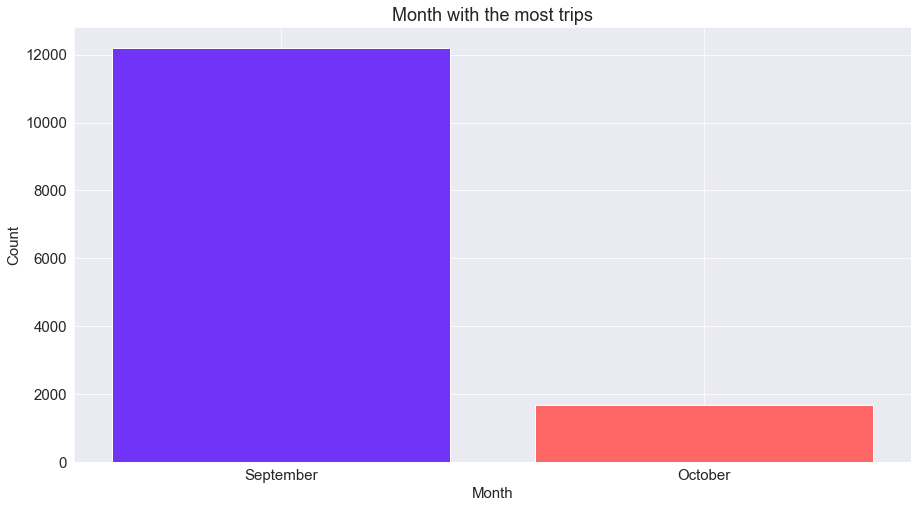

In [751]:
plt.figure(figsize = (15,8))
plt.title('Month with the most trips',fontsize = 18)
plt.bar(data['month'],data['count'],color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

## Observation
- Most of the trips are done in the month of september

## Finding the hour at which maximum of the trips are created.

In [752]:
data = final_data['hour'].value_counts().reset_index(name = 'count')
data.rename(columns = {
    'index':'hours'
},inplace = True)
data

,hours,count
0,23,1073
1,22,1053
2,20,1027
3,0,952
4,21,831
5,19,760
6,1,680
7,2,646
8,18,642
9,3,627


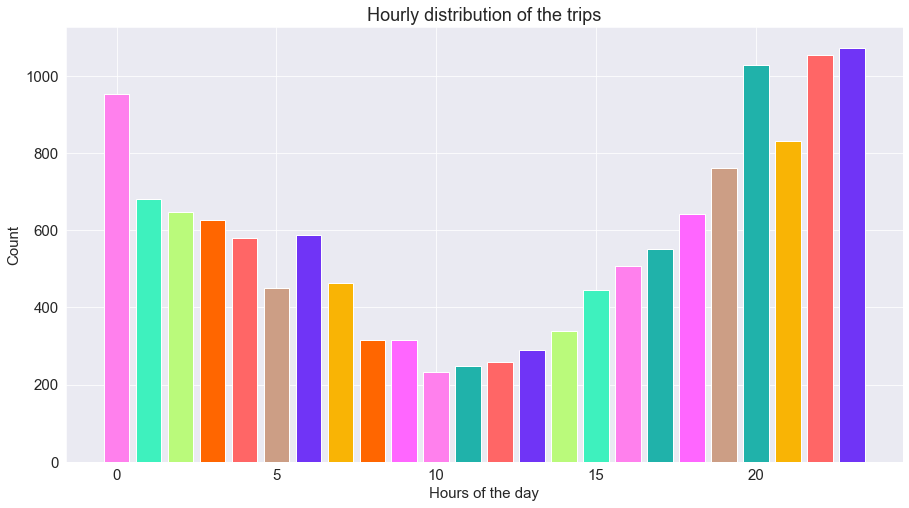

In [753]:
plt.figure(figsize = (15,8))
plt.title('Hourly distribution of the trips',fontsize = 18)
plt.bar(data['hours'],data['count'],color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Hours of the day',fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

## Observations
- We observe that most of the trips get createad late at night from 8:00 pm to 12:00 am

## Multivariate Analysis

#### How route_type affects .
- start_scan_to_end_scan
- actual_distance_to_destination
- actual_time
- osrm_time
- osrm_distance
- segment_actual_time
- segment_osrm_time
- segment_osrm_distance
- diff_start_end

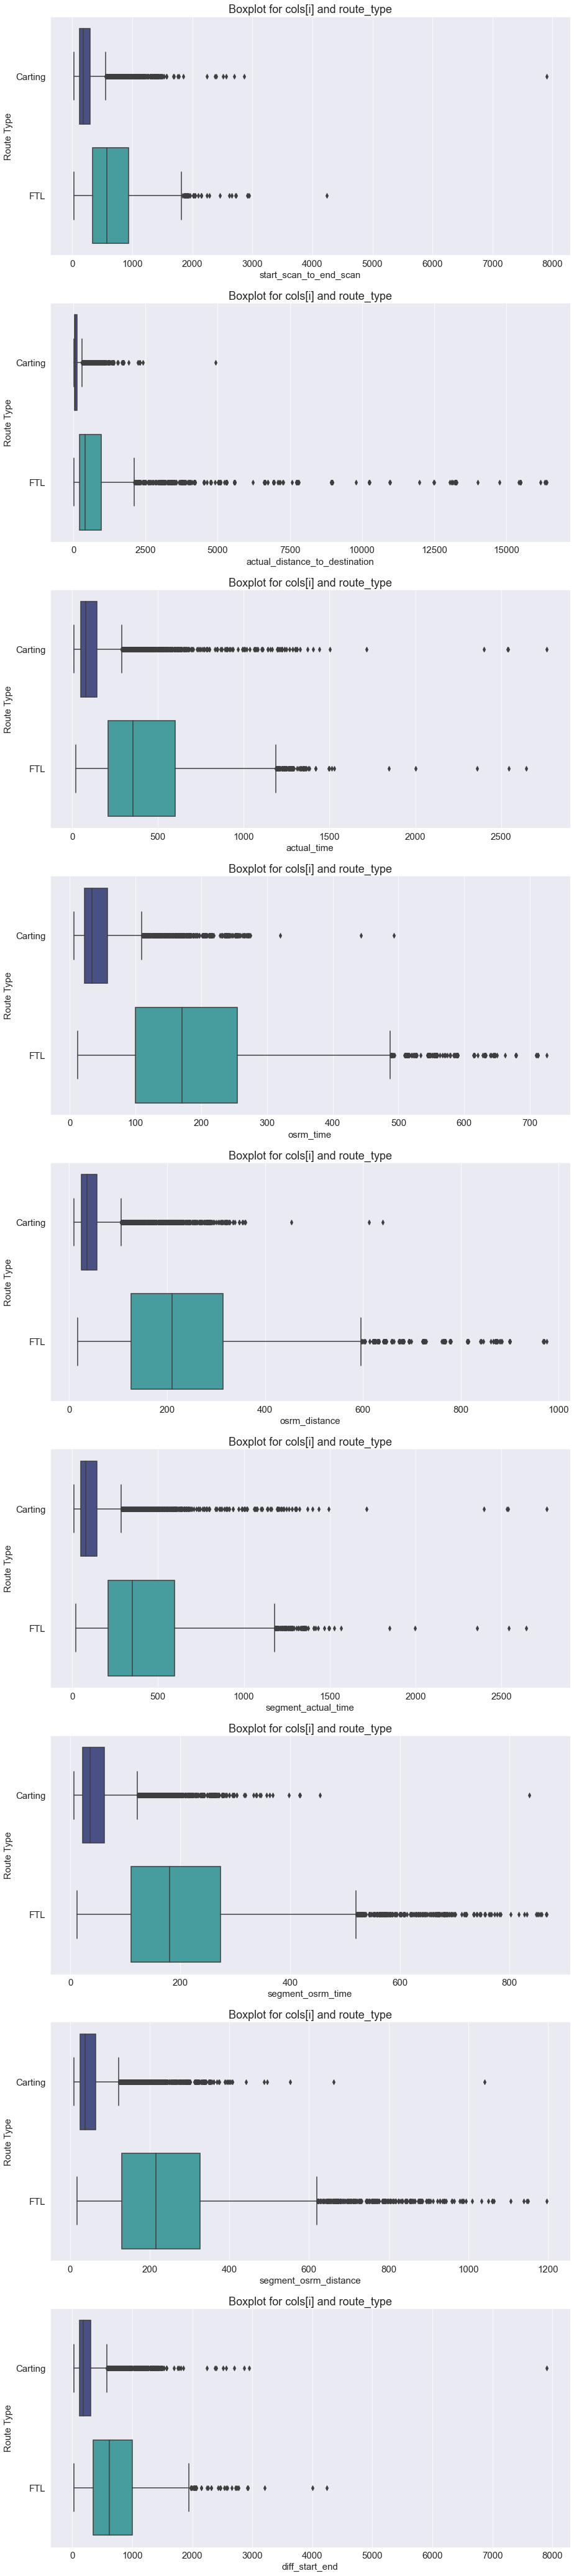

In [754]:
plt.figure(figsize = (15,75))
for i in range(len(cols)):
    plt.subplot(9,1,i+1)
    plt.title(f"Boxplot for cols[i] and route_type",fontsize = 18)
    sns.boxplot(data = final_data,x = cols[i],y = 'route_type',palette = 'mako')
    plt.xlabel(cols[i],fontsize = 15)
    plt.ylabel('Route Type',fontsize =15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
plt.show()

## Observations

- Median time taken from start scan to end scan is more in FTL as compared to Carting.
- Median of actual distance is more in FTL as compared to Carting.
- Median of actual time is more in FTL as compared to Carting.
- Median of osrm time is more in FTL as compared to Carting.
- Median of osrm distance is more in FTL as compared to Carting.
- Median of segment actual time is more in FTL as compared to Carting.
- Median of segment osrm time is more in FTL as compared to Carting.
- Median of segment osrm distance is more in FTL as compared to Carting.
- Median of time taken from trip creation to trip end is more in FTL as compared to Carting.

## Pairplot for numerical columns

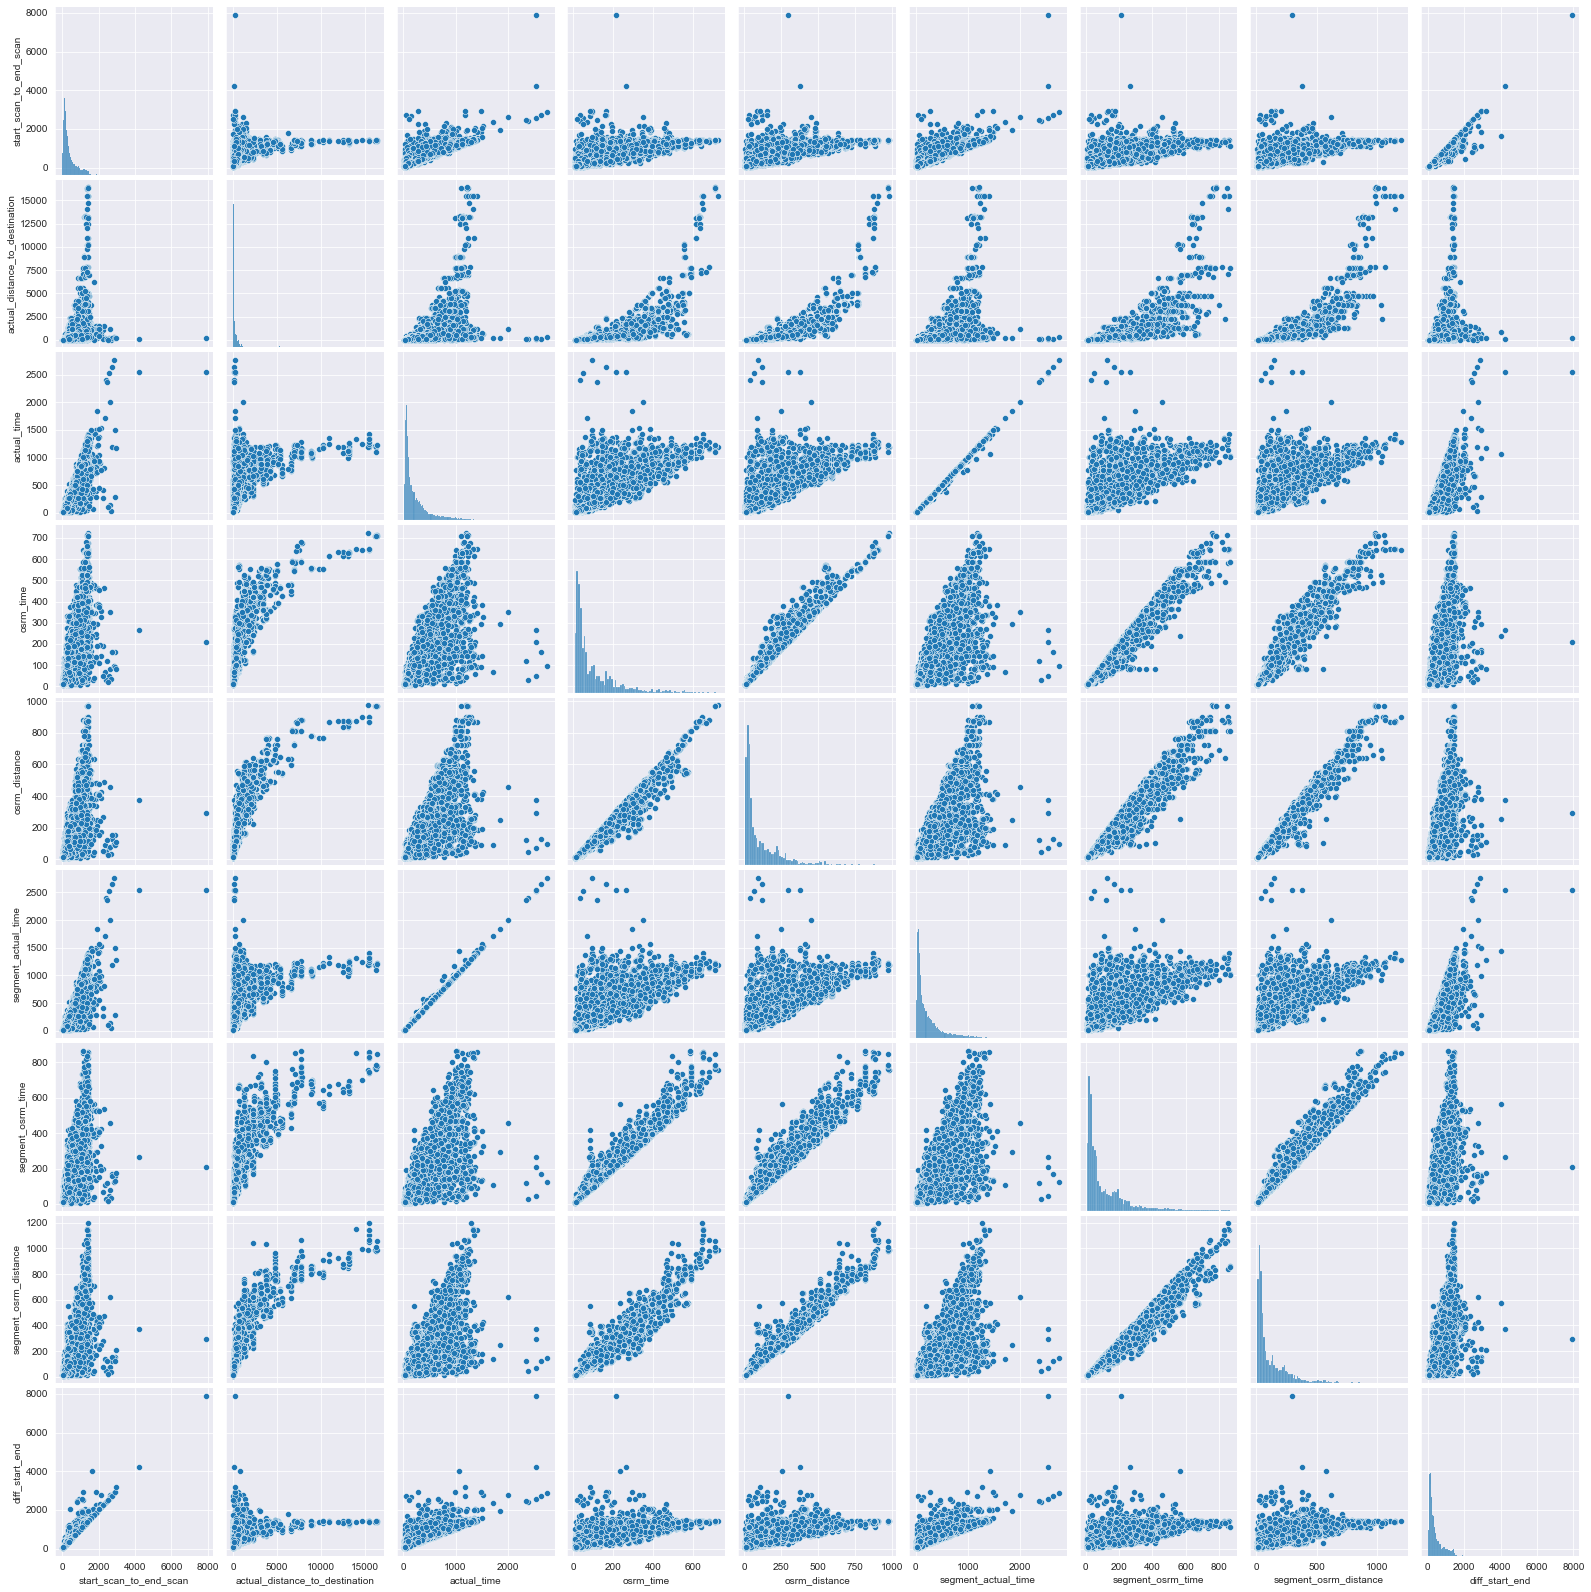

In [755]:
sns.pairplot(data = final_data[cols])

## Correlation

In [756]:
df_corr = final_data[cols].corr()
df_corr

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff_start_end
start_scan_to_end_scan,1.000000,0.508556,0.877527,0.767171,0.763116,0.878341,0.749752,0.753383,0.981172
actual_distance_to_destination,0.508556,1.000000,0.605617,0.757014,0.799824,0.601804,0.754966,0.800028,0.484316
actual_time,0.877527,0.605617,1.000000,0.830825,0.833105,0.999756,0.817397,0.825832,0.863633
osrm_time,0.767171,0.757014,0.830825,1.000000,0.987162,0.827843,0.984956,0.976376,0.754920
osrm_distance,0.763116,0.799824,0.833105,0.987162,1.000000,0.829806,0.972878,0.989355,0.749899
segment_actual_time,0.878341,0.601804,0.999756,0.827843,0.829806,1.000000,0.814915,0.822932,0.865134
segment_osrm_time,0.749752,0.754966,0.817397,0.984956,0.972878,0.814915,1.000000,0.981267,0.737904
segment_osrm_distance,0.753383,0.800028,0.825832,0.976376,0.989355,0.822932,0.981267,1.000000,0.740003
diff_start_end,0.981172,0.484316,0.863633,0.754920,0.749899,0.865134,0.737904,0.740003,1.000000


<AxesSubplot:>

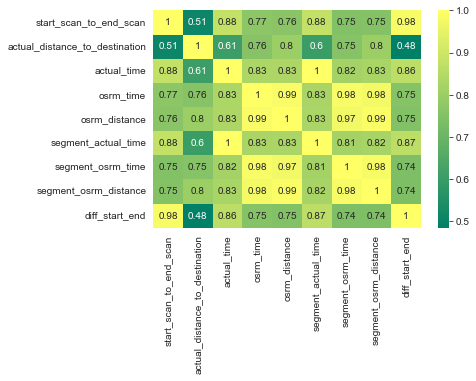

In [757]:
sns.heatmap(data = df_corr,annot = True,cmap = 'summer')

## Observations
- start_scan_to_end_scan and diff_start_end are strongly correlated
- osrm_time and osrm_distance are strongly correlated
- osrm_distance and segment_osrm_time and segment_osrm_distance are strongly correlated


## Comparing the difference between time taken from start scan to end scan and time taken between start of the trip to end of the trip

In [758]:
final_data[['start_scan_to_end_scan','diff_start_end']].describe()

,start_scan_to_end_scan,diff_start_end
count,13873.000000,13873.000000
mean,395.240683,412.807401
std,366.193598,387.588021
min,23.000000,23.461468
25%,143.000000,145.701480
50%,257.000000,263.829675
75%,519.000000,554.713227
max,7898.000000,7898.551955


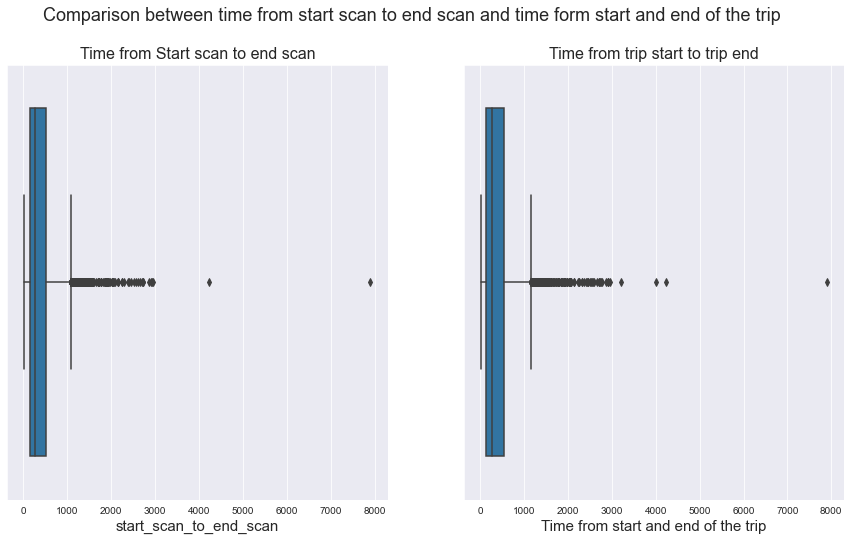

In [759]:
plt.figure(figsize = (15,8))
plt.suptitle('Comparison between time from start scan to end scan and time form start and end of the trip',
         fontsize = 18)
plt.subplot(1,2,1)
plt.title('Time from Start scan to end scan',fontsize = 16)
sns.boxplot(data = final_data,
            x='start_scan_to_end_scan')
plt.xlabel('start_scan_to_end_scan',fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(data = final_data,x = 'diff_start_end')
plt.title('Time from trip start to trip end',fontsize = 16)
plt.xlabel('Time from start and end of the trip',fontsize =15)
plt.show()

## Observation 
- It is observed that both the fields
    - time from start scan to end scan 
    - time from start of the trip to end
    have similar mean
- Since they have similar mean we need to prove it by doing a hypothesis testing 

## Hypothesis Test for comparing the difference between diff_start_end and start_scan_to_end_scan.
#### Step 1 : Setup Null Hypothesis
- Null Hypothesis(H0) : The mean of diff_start_end and mean of start_scan_to_end_scan is same.
- Alternate Hypothesis(Ha) : The mean of diff_start_end and mean of start_scan_to_end_scan is different.
    
#### Step 2: Checking for Assumptions of Ttest
- Data has follow normal distribution(Shapiro Test)
- Data has to be homogenous (Levene's Test)

#### Step 3: Define Test statistics
- If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T test for independent sample.

#### Step 4: Compute the p-value and based on it accept or reject H0.
- If pvalue < alpha: Reject Ho
- If pvalue > alpha: Failed to reject Ho

### Shapiro Test to check if the data has normal distribution

In [760]:
alpha = 0.05
subset_diff_start_end = final_data['diff_start_end'].sample(100)
subset_start_scan_to_end_scan = final_data['start_scan_to_end_scan'].sample(100)
Ho = 'The sample follows normal distribution'
Ha = 'The sample does not follow normal distribution'
print('For diff_start_end')
test_stat,pvalue = shapiro(subset_diff_start_end)
if pvalue<alpha:
    print('Reject Ho ', Ha)
else:
    print('Failed to reject Ho ',Ho )

print('For start_scan_to_end_scan')
test_stat1,pvalue1 = shapiro(subset_start_scan_to_end_scan)
if pvalue1<alpha:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho',Ho)

For diff_start_end
Reject Ho  The sample does not follow normal distribution
For start_scan_to_end_scan
Reject Ho The sample does not follow normal distribution


## Levenes Test to check if the data has Homogenous variances

In [761]:
Ho = 'Homogenous Variance'
Ha = 'Non Homogenous Variance'
test_stat,pvalue = levene(final_data['diff_start_end'],final_data['start_scan_to_end_scan'])
print(pvalue)
if pvalue < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

6.0440281159665046e-05
Reject Ho Non Homogenous Variance


#### Since the samples are not normally distributed and doesnot have homogenous variances we cannot do Ttest. So we will apply non parametric equivalent test i.e Mann-Whitney U rank test for two independent samples.

In [762]:
Ho = 'The mean of diff_start_end and mean of start_scan_to_end_scan is same.'
Ha = 'The mean of diff_start_end and mean of start_scan_to_end_scan is different.'
test_stat,p_value = mannwhitneyu(final_data['diff_start_end'],final_data['start_scan_to_end_scan'])
print(p_value)

0.0080802210102983


In [763]:
if p_value < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

Reject Ho The mean of diff_start_end and mean of start_scan_to_end_scan is different.


## Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [764]:
final_data[['actual_time','osrm_time']].describe()

,actual_time,osrm_time
count,13873.000000,13873.000000
mean,236.835147,101.568731
std,261.094736,111.445321
min,9.000000,6.000000
25%,64.000000,28.000000
50%,132.000000,55.000000
75%,310.000000,138.000000
max,2764.000000,725.000000


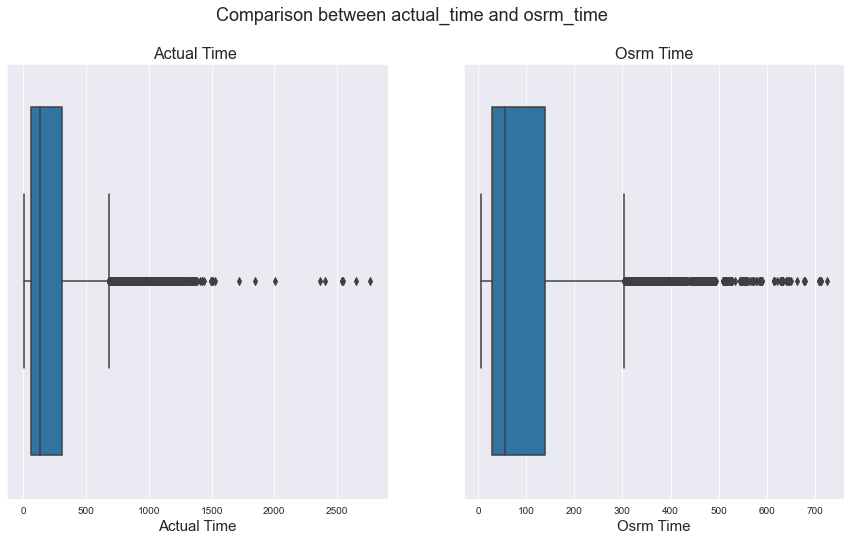

In [765]:
plt.figure(figsize = (15,8))
plt.suptitle('Comparison between actual_time and osrm_time',
         fontsize = 18)
plt.subplot(1,2,1)
plt.title('Actual Time ',fontsize = 16)
sns.boxplot(data = final_data,
            x='actual_time')
plt.xlabel('Actual Time',fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(data = final_data,x = 'osrm_time')
plt.title('Osrm Time',fontsize = 16)
plt.xlabel('Osrm Time',fontsize =15)
plt.show()

## Observation
- Both acutal time and osrm time have different mean

## Here we will apply Ttest and check for assumptions of Ttest.

### Shapiro Test to check if the data has normal distribution

In [766]:
alpha = 0.05
subset_actual_time = final_data['actual_time'].sample(100)
subset_osrm_time = final_data['osrm_time'].sample(100)
Ho = 'The sample follows normal distribution'
Ha = 'The sample does not follow normal distribution'
print('For Actual time')
test_stat,pvalue = shapiro(subset_actual_time)
if pvalue<alpha:
    print('Reject Ho ', Ha)
else:
    print('Failed to reject Ho ',Ho )

print('For Osrm time')
test_stat1,pvalue1 = shapiro(subset_osrm_time)
if pvalue1<alpha:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho',Ho)

For Actual time
Reject Ho  The sample does not follow normal distribution
For Osrm time
Reject Ho The sample does not follow normal distribution


### Levenes Test to check if the data has Homogenous variances

In [767]:
Ho = 'Homogenous Variance'
Ha = 'Non Homogenous Variance'
test_stat,pvalue = levene(final_data['actual_time'],final_data['osrm_time'])
print(pvalue)
if pvalue < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

0.0
Reject Ho Non Homogenous Variance


### Since the samples are not normally distributed and doesnot have homogenous variances we cannot do Ttest. So we will apply non parametric equivalent test i.e Mann-Whitney U rank test for two independent samples.

In [768]:
Ho = 'The mean of actual_time and mean of osrm_time is same.'
Ha = 'The mean of actual_time and mean of osrm_time is different.'
test_stat,p_value = mannwhitneyu(final_data['actual_time'],final_data['osrm_time'])
print(p_value)
if p_value < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

0.0
Reject Ho The mean of actual_time and mean of osrm_time is different.


## Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [769]:
final_data[['actual_time','segment_actual_time']].describe()

,actual_time,segment_actual_time
count,13873.000000,13873.000000
mean,236.835147,235.042529
std,261.094736,260.017505
min,9.000000,9.000000
25%,64.000000,63.000000
50%,132.000000,131.000000
75%,310.000000,307.000000
max,2764.000000,2762.000000


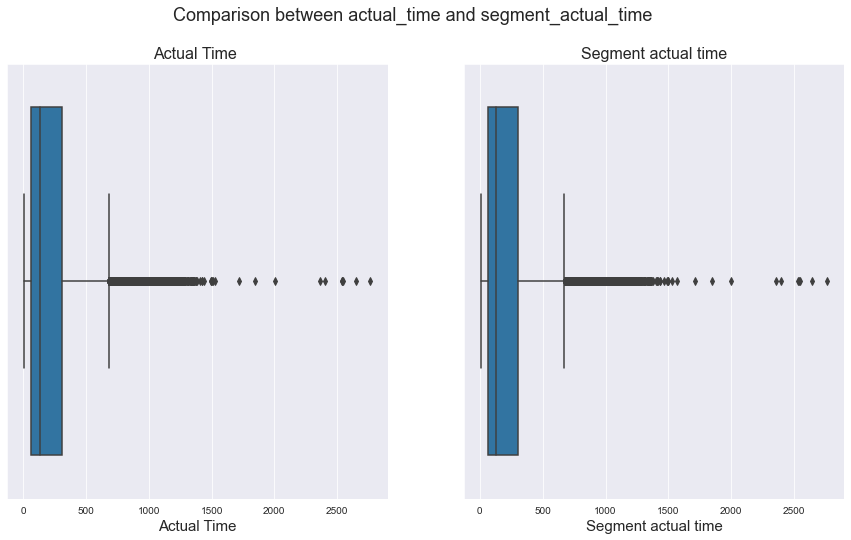

In [770]:
plt.figure(figsize = (15,8))
plt.suptitle('Comparison between actual_time and segment_actual_time',
         fontsize = 18)
plt.subplot(1,2,1)
plt.title('Actual Time ',fontsize = 16)
sns.boxplot(data = final_data,
            x='actual_time')
plt.xlabel('Actual Time',fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(data = final_data,x = 'segment_actual_time')
plt.title('Segment actual time',fontsize = 16)
plt.xlabel('Segment actual time',fontsize =15)
plt.show()

## Observations
- Here the mean of actual_time and segment_actual_time are very similar.

## Here we will apply Ttest and check for assumptions of Ttest.

### Shapiro Test to check if the data has normal distribution

In [771]:
alpha = 0.05
subset_actual_time = final_data['actual_time'].sample(100)
subset_segment_actual_time = final_data['segment_actual_time'].sample(100)
Ho = 'The sample follows normal distribution'
Ha = 'The sample does not follow normal distribution'
print('For Actual time')
test_stat,pvalue = shapiro(subset_actual_time)
if pvalue<alpha:
    print('Reject Ho ', Ha)
else:
    print('Failed to reject Ho ',Ho )

print('For Segment actual time')
test_stat1,pvalue1 = shapiro(subset_segment_actual_time)
if pvalue1<alpha:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho',Ho)

For Actual time
Reject Ho  The sample does not follow normal distribution
For Segment actual time
Reject Ho The sample does not follow normal distribution


### Levenes Test to check if the data has Homogenous variances

In [772]:
Ho = 'Homogenous Variance'
Ha = 'Non Homogenous Variance'
test_stat,pvalue = levene(final_data['actual_time'],final_data['segment_actual_time'])
print(pvalue)
if pvalue < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

0.7202779800847934
Failed to reject Ho Homogenous Variance


### Since the samples donot follow normal distribution we cannot apply Ttest. So we will apply non parametric equivalent test i.e Mann-Whitney U rank test for two independent samples.

In [773]:
Ho = 'The mean of actual_time and mean of segment_actual_time is same.'
Ha = 'The mean of actual_time and mean of segment_actual_time is different.'
test_stat,p_value = mannwhitneyu(final_data['actual_time'],final_data['segment_actual_time'])
print(p_value)
if p_value < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

0.394853029179294
Failed to reject Ho The mean of actual_time and mean of segment_actual_time is same.


## Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [774]:
final_data[['osrm_distance','segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,13873.000000,13873.000000
mean,121.770581,129.725636
std,142.844516,153.365024
min,9.072900,9.072900
25%,29.618800,31.049300
50%,56.524200,63.107200
75%,167.959800,176.686900
max,975.021600,1196.071600


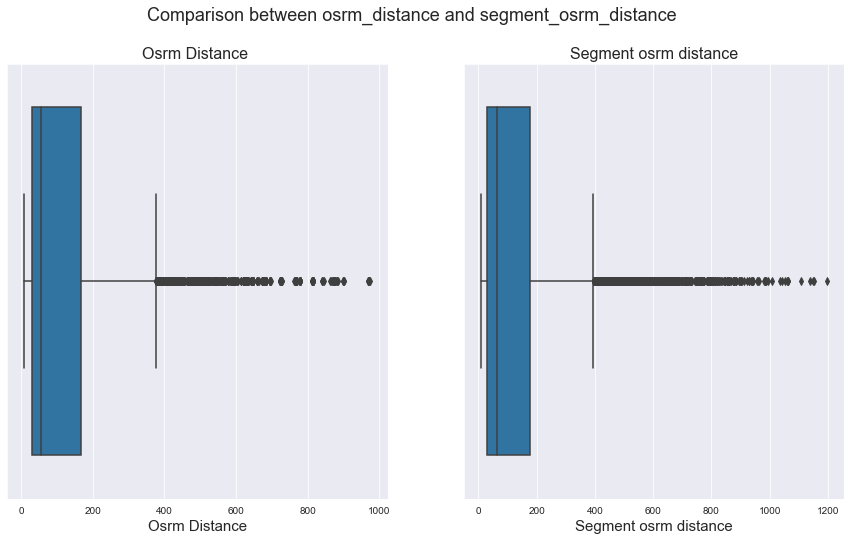

In [775]:
plt.figure(figsize = (15,8))
plt.suptitle('Comparison between osrm_distance and segment_osrm_distance',
         fontsize = 18)
plt.subplot(1,2,1)
plt.title('Osrm Distance ',fontsize = 16)
sns.boxplot(data = final_data,
            x='osrm_distance')
plt.xlabel('Osrm Distance',fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(data = final_data,x = 'segment_osrm_distance')
plt.title('Segment osrm distance',fontsize = 16)
plt.xlabel('Segment osrm distance',fontsize =15)
plt.show()

## Observations
- Here the mean of osrm distance and segment osrm distance are similar

## Here we will apply Ttest and check for assumptions of Ttest

### Shapiro Test to check if the data has normal distribution

In [776]:
alpha = 0.05
subset_osrm_distance = final_data['osrm_distance'].sample(100)
subset_segment_osrm_distance = final_data['segment_osrm_distance'].sample(100)
Ho = 'The sample follows normal distribution'
Ha = 'The sample does not follow normal distribution'
print('For osrm distance')
test_stat,pvalue = shapiro(subset_osrm_distance)
if pvalue<alpha:
    print('Reject Ho ', Ha)
else:
    print('Failed to reject Ho ',Ho )

print('For Segment osrm distance')
test_stat1,pvalue1 = shapiro(subset_segment_osrm_distance)
if pvalue1<alpha:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho',Ho)

For osrm distance
Reject Ho  The sample does not follow normal distribution
For Segment osrm distance
Reject Ho The sample does not follow normal distribution


### Levenes Test to check if the data has Homogenous variances

In [777]:
Ho = 'Homogenous Variance'
Ha = 'Non Homogenous Variance'
test_stat,pvalue = levene(final_data['osrm_distance'],final_data['segment_osrm_distance'])
print(pvalue)
if pvalue < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

0.00022791086629417916
Reject Ho Non Homogenous Variance


### Since the samples are not normally distributed and doesnot have homogenous variances we cannot do Ttest. So we will apply non parametric equivalent test i.e Mann-Whitney U rank test for two independent samples

In [778]:
Ho = 'The mean of osrm_distance and mean of segment_osrm_distance is same.'
Ha = 'The mean of osrm_distance and mean of segment_osrm_distance is different.'
test_stat,p_value = mannwhitneyu(final_data['osrm_distance'],final_data['segment_osrm_distance'])
print(p_value)
if p_value < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

2.1184063873215776e-06
Reject Ho The mean of osrm_distance and mean of segment_osrm_distance is different.


## Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [779]:
final_data[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,13873.000000,13873.000000
mean,101.568731,111.285230
std,111.445321,124.523031
min,6.000000,6.000000
25%,28.000000,29.000000
50%,55.000000,59.000000
75%,138.000000,159.000000
max,725.000000,867.000000


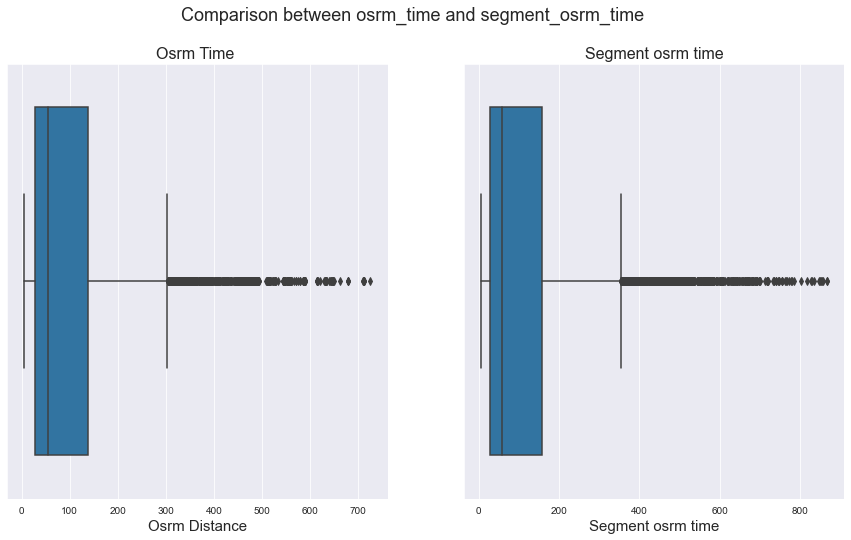

In [780]:
plt.figure(figsize = (15,8))
plt.suptitle('Comparison between osrm_time and segment_osrm_time',
         fontsize = 18)
plt.subplot(1,2,1)
plt.title('Osrm Time ',fontsize = 16)
sns.boxplot(data = final_data,
            x='osrm_time')
plt.xlabel('Osrm Distance',fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(data = final_data,x = 'segment_osrm_time')
plt.title('Segment osrm time',fontsize = 16)
plt.xlabel('Segment osrm time',fontsize =15)
plt.show()

## Observations
- The mean of osrm_time and segment_osrm_time is similar

## Here we will apply Ttest and check for assumptions of Ttest
### Shapiro Test to check if the data has normal distribution

In [781]:
alpha = 0.05
subset_osrm_time = final_data['osrm_time'].sample(100)
subset_segment_osrm_time = final_data['segment_osrm_time'].sample(100)
Ho = 'The sample follows normal distribution'
Ha = 'The sample does not follow normal distribution'
print('For osrm time')
test_stat,pvalue = shapiro(subset_osrm_time)
if pvalue<alpha:
    print('Reject Ho ', Ha)
else:
    print('Failed to reject Ho ',Ho )

print('For Segment osrm time')
test_stat1,pvalue1 = shapiro(subset_segment_osrm_time)
if pvalue1<alpha:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho',Ho)

For osrm time
Reject Ho  The sample does not follow normal distribution
For Segment osrm time
Reject Ho The sample does not follow normal distribution


### Levenes Test to check if the data has Homogenous variances

In [782]:
Ho = 'Homogenous Variance'
Ha = 'Non Homogenous Variance'
test_stat,pvalue = levene(final_data['osrm_time'],final_data['segment_osrm_time'])
print(pvalue)
if pvalue < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

1.1201005098946434e-10
Reject Ho Non Homogenous Variance


#### Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [783]:
Ho = 'The mean of osrm_time and mean of segment_osrm_time is same.'
Ha = 'The mean of osrm_time and mean of segment_osrm_time is different.'
test_stat,p_value = mannwhitneyu(final_data['osrm_time'],final_data['segment_osrm_time'])
print(p_value)
if p_value < 0.05:
    print('Reject Ho', Ha)
else:
    print('Failed to reject Ho', Ho)

2.5411832604100294e-08
Reject Ho The mean of osrm_time and mean of segment_osrm_time is different.


## One hot encoding for categorical variables
#### For route_type field

In [784]:
final_data['route_type'].value_counts()

Carting    8908
FTL        4965
Name: route_type, dtype: int64

In [785]:
label_encoder = LabelEncoder()
final_data['route_type'] = label_encoder.fit_transform(final_data['route_type'])

In [786]:
final_data['route_type'].value_counts()

0    8908
1    4965
Name: route_type, dtype: int64

- 0 for Carting
- 1 for FTL

#### For data field

In [788]:
final_data['data'].value_counts()

training    9983
test        3890
Name: data, dtype: int64

In [789]:
label_encoder = LabelEncoder()
final_data['data'] = label_encoder.fit_transform(final_data['data'])
final_data['data'].value_counts()

1    9983
0    3890
Name: data, dtype: int64

- 1 for training
- 0 for test

## Normalize/Standardize the numerical features using MinMaxScaler or StandardScaler
Here I have standardized the numerical columns

In [790]:
final_data[cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff_start_end
count,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000
mean,395.240683,434.835328,236.835147,101.568731,121.770581,235.042529,111.285230,129.725636,412.807401
std,366.193598,1118.273131,261.094736,111.445321,142.844516,260.017505,124.523031,153.365024,387.588021
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,23.461468
25%,143.000000,48.864657,64.000000,28.000000,29.618800,63.000000,29.000000,31.049300,145.701480
50%,257.000000,128.925997,132.000000,55.000000,56.524200,131.000000,59.000000,63.107200,263.829675
75%,519.000000,349.976003,310.000000,138.000000,167.959800,307.000000,159.000000,176.686900,554.713227
max,7898.000000,16387.327314,2764.000000,725.000000,975.021600,2762.000000,867.000000,1196.071600,7898.551955


In [791]:
scaler = StandardScaler()
scaler.fit(final_data[cols])

StandardScaler()

In [792]:
final_data[cols] = scaler.transform(final_data[cols])
final_data[cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,diff_start_end
count,1.387300e+04,1.387300e+04,1.387300e+04,1.387300e+04,1.387300e+04,1.387300e+04,1.387300e+04,1.387300e+04,1.387300e+04
mean,-4.735534e-17,-3.627251e-17,7.668646e-18,5.235406e-17,9.788177e-17,4.192446e-17,-2.823374e-17,6.216145e-17,4.961512e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-1.016550e+00,-3.808088e-01,-8.726463e-01,-8.575701e-01,-7.889819e-01,-8.693671e-01,-8.455386e-01,-7.867314e-01,-1.004572e+00
25%,-6.888427e-01,-3.451613e-01,-6.619872e-01,-6.601568e-01,-6.451427e-01,-6.616813e-01,-6.608271e-01,-6.434315e-01,-6.891739e-01
50%,-3.775207e-01,-2.735650e-01,-4.015360e-01,-4.178768e-01,-4.567815e-01,-4.001511e-01,-4.198991e-01,-4.343939e-01,-3.843852e-01
75%,3.379736e-01,-7.588699e-02,2.802335e-01,3.269099e-01,3.233648e-01,2.767508e-01,3.831941e-01,3.062169e-01,3.661386e-01
max,2.048924e+01,1.426581e+01,9.679460e+00,5.594257e+00,5.973500e+00,9.718763e+00,6.069094e+00,6.953244e+00,1.931436e+01


## Business Insights
- Most of the data is for Training then for testing.
- Most common route is carting consisting of 64.21% of the total.
- The busiest route starts from Lower Parel and ends in Mumbai.
- The city with maximum trips starting and ending is Bengaluru.
- The state with maximum trips starting and ending is Maharashtra.
- Majority of the trips gets created after 8:00 pm to 12:00 am.
- Carting is fast and covers less distance compared to FTL which covers large distances and relatively slow.
- Time from start scan to end scan and time from start trip to end trip is not same.
- Actual time taken for the trip is different from the osrm time.
- Features osrm_distance and segment_osrm_distance are statistically different from each other.
- Both the osrm_time & segment_osrm_time are not statistically same

## Recommendations
- The actual time and osrm actual time is different meaning the shortest route is not being pursued by the delivery.
- The osrm distance and the segment osrm distance is different meaning the osrm system needs to improved and solve the discrepancies.
- There is too much dependence on single route , we need to come up with better alternative routes for even dependence.
